El formato de entrega será subir a u-cursos un Jupyter notebook laboratorio8.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y el notebook debe estar escrito en forma de informe técnico, escribiendo una celda markdown antes de cada celda de código. **Recuerde escribir el nombre de todos los integrantes que trabajaron en la elaboración del entregable**.





**Integrantes**:
1. Jorge Herrera
2. Fabian Leal
3. Angie Villamil




# Laboratorio 8: Deep Learning

Objetivos:



1.  Entender qué es una red neuronal y sus principales componentes
2.  Comprender las limitaciones de las redes neuronales
3.  Conocer los beneficios que tiene el uso de una tarjeta gráfica (GPU)





# 1. Estructura Red Neuronal

In [0]:
class FFNN():
  def __init__(self, F):
    #Inicializamos parámetros, la función de activación se puede definir afuera y entregar.
    
    self.W = weights #W
    self.b = biases  #b
    self.F = F # Función de activación
    

    def Fit(X,Y): # A diferencia de los casos anteriores
        backpropagate() #Backpropagación haciendo uso de la regla de la cadena actualiza los pesos "hacia atrás"
        optimize() # Con los pesos calculados se utiliza una función (un método de optimización) ajustando así b y W        
      
    
    def backpropagate():
      #Aca se calculan las derivadas asociadas a la función de costo
      
    def optimize():
      #Se define el método de optimización, usualmente se usa método del gradiente de newton o ADAM, o métodos estocásticos de optimización.
      #La idea es encontrar pesos óptimos
      
    
    def Predict(X):
      # Una vez que tenemos entrenado un modelo, usualmente queremos hacer predicciones, para este caso
      # entregamos el vector de variables, y nos retorna un vector con los valores predichos para cada observación.
      return predictions
    
    
  # Definimos los métodos para entrenar por GPU o CPU
    def gpu(self):
      pass
    def cpu(self):
      pass

In [0]:
#Usualmente al entrenar una red, lo que hacemos es entregar el objeto red
#Más el dataset (en batches), la función que queremos para optimizar y el número de épocas (iteraciones)
#Es posible entrenar una red con todo el conjunto de datos de una, pero dependiendo la cantidad de datos muy posiblemente nuestra memoria no podrá

def entrenar_FFNN(red, dataset, optimizador, epochs):
  init_time=time()
  for epoch in range(epochs):
    for x,y in dataset.paquetes(B):
      red.fit(x,y)
      y_pred=red.predict(x)
     

# 2. Ejemplo

In [0]:
!git clone https://github.com/Camiloez/Labs-DL.git

Cloning into 'Labs-DL'...
remote: Enumerating objects: 4008, done.
remote: Counting objects: 100% (4008/4008), done.
remote: Compressing objects: 100% (4008/4008), done.
remote: Total 4008 (delta 0), reused 4008 (delta 0), pack-reused 0
Receiving objects: 100% (4008/4008), 86.14 MiB | 13.70 MiB/s, done.


In [0]:
!ls

cat  dog


In [0]:
import os
os.chdir("Labs-DL")

In [0]:
import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

In [0]:
img_width = 150
img_height = 150
CAT_DIR = 'cat/'
DOG_DIR = 'dog/'
cats = [CAT_DIR+i for i in os.listdir(CAT_DIR)] # use this for full dataset
dogs = [DOG_DIR+i for i in os.listdir(DOG_DIR)]


In [0]:
print(dogs)

['dog/dog.1077.jpg', 'dog/dog.466.jpg', 'dog/dog.103.jpg', 'dog/dog.1753.jpg', 'dog/dog.457.jpg', 'dog/dog.56.jpg', 'dog/dog.1995.jpg', 'dog/dog.910.jpg', 'dog/dog.718.jpg', 'dog/dog.545.jpg', 'dog/dog.1982.jpg', 'dog/dog.1895.jpg', 'dog/dog.533.jpg', 'dog/dog.982.jpg', 'dog/dog.241.jpg', 'dog/dog.1392.jpg', 'dog/dog.1658.jpg', 'dog/dog.931.jpg', 'dog/dog.759.jpg', 'dog/dog.809.jpg', 'dog/dog.1477.jpg', 'dog/dog.509.jpg', 'dog/dog.250.jpg', 'dog/dog.1829.jpg', 'dog/dog.1570.jpg', 'dog/dog.983.jpg', 'dog/dog.1791.jpg', 'dog/dog.1726.jpg', 'dog/dog.536.jpg', 'dog/dog.1182.jpg', 'dog/dog.694.jpg', 'dog/dog.598.jpg', 'dog/dog.291.jpg', 'dog/dog.217.jpg', 'dog/dog.659.jpg', 'dog/dog.735.jpg', 'dog/dog.989.jpg', 'dog/dog.1694.jpg', 'dog/dog.670.jpg', 'dog/dog.1343.jpg', 'dog/dog.400.jpg', 'dog/dog.401.jpg', 'dog/dog.1473.jpg', 'dog/dog.666.jpg', 'dog/dog.829.jpg', 'dog/dog.1094.jpg', 'dog/dog.1050.jpg', 'dog/dog.300.jpg', 'dog/dog.1109.jpg', 'dog/dog.1823.jpg', 'dog/dog.1056.jpg', 'dog/dog.2

In [0]:
def prepare_data(cats, dogs):
    x_cats = [] # images as arrays
    x_dogs=[]
    y_cats = [] # labels
    y_dogs=[]
    
    for image in cats:
        try:
          x_cats.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
          y_cats.append(0)
        except:
          pass
    
    for image in dogs:
      try:
        x_dogs.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
        y_dogs.append(1)
      except:
        pass
    
    X_train=x_cats[0:1500] + x_dogs[0:1500]
    y_train=y_cats[0:1500] + y_cats[0:1500]
    
    X_test=x_cats[1500:2000] + x_dogs[1500:2000]
    y_test=y_cats[1500:2000] + y_dogs[1500:2000]
    
 
    return X_train, y_train, X_test, y_test

In [0]:
X_train, y_train, X_test, y_test = prepare_data(cats, dogs)
print(K.image_data_format())

channels_last


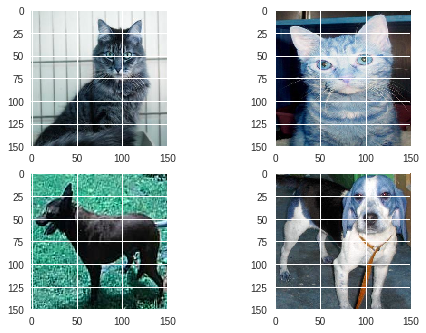

In [0]:
plt.subplot(221)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[11], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2012], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[2014], cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

#Pasar a categoricas
y_train=to_categorical(to_categorical(y_train))
y_test=to_categorical(to_categorical(y_test))

In [0]:
X_train.shape

(3000, 150, 150, 3)

In [0]:
y_train.shape

(3000, 2)

In [0]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### 2.1 Red Neuronal MLP (Multilayer Perceptron)

In [0]:
def NN():
  #Declaramos la estructura de la red
  model=models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(img_width, img_height, 3)))
  model.add(layers.Dense(15, activation='sigmoid'))
  model.add(layers.Flatten())
  model.add(layers.Dense(2, activation='sigmoid'))
  
  
  #Compilamos el modelo
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  
  
  return model

In [0]:
t_i=time()

red=NN()
red.fit(X_train, y_train, epochs=10, batch_size=128)
t_f=time()- t_i

print("Tiempo Entrenamiento: {}".format(t_f))

Epoch 1/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0517 - acc: 0.9573
Epoch 2/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 3/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 4/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 5/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 6/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 7/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 8/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 9/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 10/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.1921e-07 - acc: 

### 2.2 Red Neuronal Convolucional

In [0]:
X_train, y_train, X_test, y_test = prepare_data(cats, dogs)


X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

#Pasar a categoricas
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [0]:
def NN():
  #Declaramos la estructura de la red
  model=models.Sequential()

  #Construcción de capas
  model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(32, (3, 3)))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(64, (3, 3)))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Activation('relu'))
  model.add(layers.Dense(1))
  model.add(layers.Activation('sigmoid'))
  
  #Compilamos el modelo
  model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  return model

In [0]:
t_i=time()

red=NN()
red.fit(X_train, y_train, epochs=10, batch_size=128)

t_f=time()- t_i

print("Tiempo Entrenamiento: {}".format(t_f))

Epoch 1/10
3000/3000 [==============================] - 4s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 2/10
3000/3000 [==============================] - 3s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 3/10
3000/3000 [==============================] - 3s 998us/step - loss: nan - acc: 0.0000e+00
Epoch 4/10
3000/3000 [==============================] - 3s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 5/10
3000/3000 [==============================] - 3s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 6/10
3000/3000 [==============================] - 3s 998us/step - loss: nan - acc: 0.0000e+00
Epoch 7/10
3000/3000 [==============================] - 3s 999us/step - loss: nan - acc: 0.0000e+00
Epoch 8/10
3000/3000 [==============================] - 3s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 9/10
3000/3000 [==============================] - 3s 998us/step - loss: nan - acc: 0.0000e+00
Epoch 10/10
3000/3000 [==============================] - 3s 1000us/step - loss: nan - acc: 0.0000e+00
Tiempo E

# Investigación (2 ptos)

Responda 4 de 5 preguntas, si contesta todas se elegirán las mejores.

1. Explique qué es una red neuronal (no más de 3 líneas).

Una red neuronal 
2. ¿Qué es una función de activación? ¿Por qué se utilizan? ¿Qué característica es deseable (si es que no necesaria) que tengan estas? (hint: piense en óptimos locales y globales y cuál le gustaría tener)
3. ¿En qué consiste el algoritmo de backpropagation? ¿Por qué es tan importante para entrenar una red?
4. ¿Por qué se dice que las redes neuronales son *cajas negras*? ¿Es esto siempre un problema?  Justifique (Hint: piense en el *tradeoff* usual de interpretabilidad v/s precisión)
5. ¿Qué es una red convolucional? Mencione al menos 2 casos en los que sean particularmente útiles y explique qué ventaja tiene la convolución v/s el enfoque tradicional.



# Laboratorio (4 ptos)

En esta sección del laboratorio se utilizará un conocido dataset: MNIST, el cual consiste en dígitos del 1 al 9
escritos a mano.p
Cada uno está en 28 x 28 pixeles y posee una etiqueta indicando su valor real.















In [0]:
from keras.datasets import mnist
import matplotlib.pylab as plt
from keras.utils import to_categorical
from keras import models, layers



In [0]:
#Carga de datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


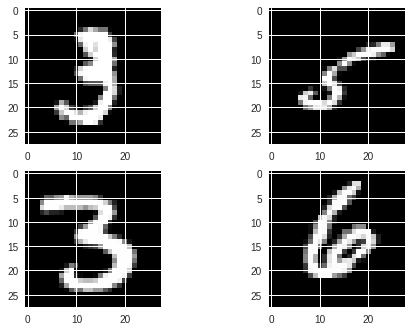

In [0]:

#Plot de algunos números
plt.subplot(221)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[11], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[12], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[13], cmap=plt.get_cmap('gray'))
plt.show()

**Tareas:**


1.   Entrene al menos 2 modelos de clasificación distintos a una red neuronal (no es necesario que ajuste excesivamente los parámetros)  (**0.5 pto**)
2. Implemente una red MLP (multilayer perceptron) fully connected con al menos 500 épocas. Para cada uno de los siguientes item pruebe al menos 2 configuraciones distintas: capas ocultas, neuronas por capas,  optimizador, funciones de activación. <br>
Reporte un gráfico de accuracy v/s épocas y otro de precisión v/s tiempo de entrenamiento. Compare respecto a los modelos entrenados en 1. (**3 ptos**) 
3. Elija una de las configuraciones anteriores y compare los tiempos de entrenamiento usando CPU y GPU (**0.5 pto**)

**Nota:** para el punto 3 se recomienda fuertemente utilizar colaboratory, ya que aunque tenga un computador con GPU la instalación de Keras y el uso de ésta no es sencilla.

(**BONUS - 2.5 pto**) Implemente  y entrene una red convolucional.




#1. Entrenamiento 2 modelos

# 2.  Entrenamiento red neuronal


In [0]:
from keras.datasets import mnist
import matplotlib.pylab as plt
from keras.utils import to_categorical
from keras import models, layers
from time import time


#Carga de datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Transformar shape de las imagenes a vectores de 28 x 28

In [0]:
#Reshape
X_train=X_train.reshape((60000, 28*28))
X_test=X_test.reshape((10000,28*28))

#Normalizamos los valores
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

print(X_train.shape)
print(X_test.shape)



(60000, 784)
(10000, 784)


In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [0]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### 2.1 Construcción de la Red

In [0]:
def NN():
  #Declaramos la estructura de la red
  network=models.Sequential()
  
  #Capa inicial
  network.add(layers.Dense(16, activation='relu', input_shape=(28*28)))
  
  network.add() #Agregamos capas ocultas
  network.add() 
  
  #Capa salida
  network.add(layers.Dense(10, activation='sigmoid'))

  network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  
  return network

### 3. Uso de GPU y CPU

In [0]:
import os
from time import time
import tensorflow as tf


In [0]:
#Uso de CPU

#Entrenamiento red
t_i=time()



red=NN()
with tf.device('/cpu:0'):
    red.fit(X_train, y_train, epochs=10, batch_size=128)

t_f=time()- t_i

print("Tiempo Entrenamiento: {}".format(t_f))

In [0]:
#Uso de GPU
t_i=time()

red=NN()
red.fit(X_train, y_train, epochs=10, batch_size=128)
scores = red.evaluate(X_test, y_test, verbose=0)

t_f=time()- t_i

print("Error: %.2f%%" % (100-scores[1]*100))
print("Tiempo Entrenamiento: {}".format(t_f))